In [17]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import requests
import os
import json

# rest_df, establishments with 'restaurant' type from current_foods
*consider semantic analysis for editorial_summary

*condider including features from 'types'
{'grocery_or_supermarket': 2,
 'night_club': 7,
 'bar': 12}

In [5]:
cf_df = pd.read_csv('data/cf_google_yelp.tsv', sep='\t', index_col=0)

In [6]:
# ['restaurant', 'liquor_store','cafe','night_club','bar','bakery']
want_types = ['restaurant']
want_cond_zip = zip(*[[want in eval(t) for t in cf_df.types] for want in want_types])
want_cond = [np.any(x) for x in want_cond_zip]
feature_cols = ['name',
                'url',
                'addr_1',
                'addr_2',
                'country',
                'curbside_pickup',
                'delivery',
                'dine_in',
                'price_level',
                'rating',
                'reservable',
                'serves_beer',
                'serves_breakfast',
                'serves_brunch',
                'serves_dinner',
                'serves_lunch',
                'serves_vegetarian_food',
                'serves_wine',
                'takeout',
                'user_ratings_total',
                'wheelchair_accessible_entrance',
                'zipcode',
                'editorial_summary',
                'types',
                'categories']
rest_df = cf_df.loc[want_cond][feature_cols]

In [7]:
rest_df.to_csv('data/cf_restaurants.tsv', sep='\t')

In [24]:
rest_df.zipcode

0      77433
21     90029
22     91950
23     64106
24     50309
       ...  
502    94133
503    94114
504    60642
506    94608
510    94110
Name: zipcode, Length: 99, dtype: object

In [23]:
rest_df.country.value_counts()

ITALY                       57
UNITED STATES OF AMERICA    39
SPAIN                        2
BELGIUM                      1
Name: country, dtype: int64

In [22]:
rest_df.columns

Index(['name', 'url', 'addr_1', 'addr_2', 'country', 'curbside_pickup',
       'delivery', 'dine_in', 'price_level', 'rating', 'reservable',
       'serves_beer', 'serves_breakfast', 'serves_brunch', 'serves_dinner',
       'serves_lunch', 'serves_vegetarian_food', 'serves_wine', 'takeout',
       'user_ratings_total', 'wheelchair_accessible_entrance', 'zipcode',
       'editorial_summary', 'types', 'categories'],
      dtype='object')

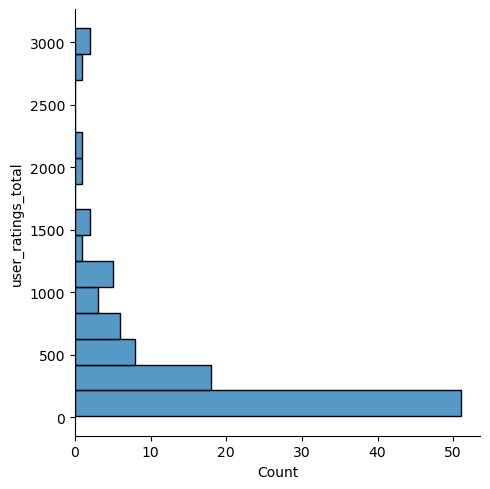

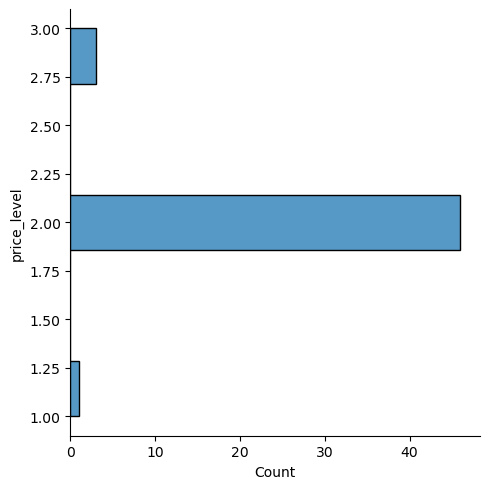

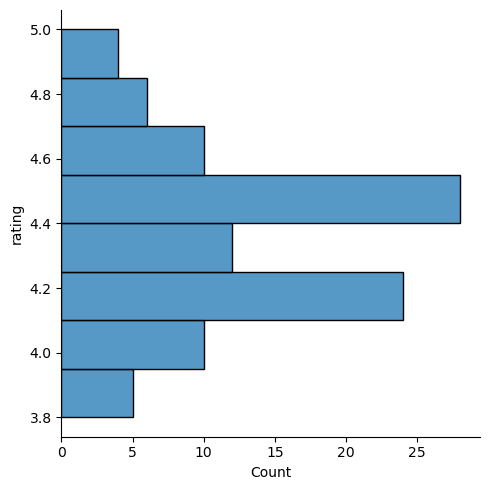

In [20]:
sns.displot(y='user_ratings_total',data=rest_df.select_dtypes(float))
sns.displot(y='price_level',data=rest_df.select_dtypes(float))
sns.displot(y='rating',data=rest_df.select_dtypes(float))

### Income Data

In [30]:
income = pd.read_csv('data/ACSST5Y2021.S1901-Data.csv')

/var/folders/q2/gldktxqd3tx2f_pmssngnvbm0000gn/T/ipykernel_12862/2046003785.py:1: DtypeWarning: Columns (2,3,4,5,66,67,68,69,130,131,132,133,194,195,196,197) have mixed types. Specify dtype option on import or set low_memory=False.
  income = pd.read_csv('data/ACSST5Y2021.S1901-Data.csv')


### extra info df

In [ ]:
extra_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   service_options    99 non-null     object
 1   popular_for        38 non-null     object
 2   accessibility      98 non-null     object
 3   offerings          98 non-null     object
 4   dining_options     97 non-null     object
 5   amenities          93 non-null     object
 6   atmosphere         97 non-null     object
 7   planning           90 non-null     object
 8   payments           95 non-null     object
 9   crowd              89 non-null     object
 10  recycling          1 non-null      object
 11  highlights         30 non-null     object
 12  from_the_business  3 non-null      object
dtypes: object(13)
memory usage: 10.8+ KB


In [ ]:
extra_df = pd.read_csv('data/cf_restaurants_extra_data.tsv', sep='\t', index_col=0)
extra_df.rename(columns=lambda x: x.lower().replace(" ","_"), inplace=True)
extra_features = []
for col in extra_df.columns:
    extra_df[col] = extra_df[col].astype(str).map(lambda x: eval(x) if x != 'nan' else np.nan)
    extra_features.extend(set([x.lower() for arr in extra_df[col].dropna() for x in arr]))
extra_features

['takeout',
 'drive-through',
 'dine-in',
 'outdoor seating',
 'delivery',
 'in-store shopping',
 'no-contact delivery',
 'curbside pickup',
 'same-day delivery',
 'in-store pickup',
 'breakfast',
 'solo dining',
 'dinner',
 'lunch',
 'wheelchair accessible seating',
 'wheelchair accessible entrance',
 'wheelchair accessible parking lot',
 'wheelchair accessible restroom',
 'quick bite',
 'healthy options',
 'late-night food',
 "kids' menu",
 'organic products',
 'happy hour drinks',
 'coffee',
 'comfort food',
 'salad bar',
 'cocktails',
 'small plates',
 'halal food',
 'hard liquor',
 'alcohol',
 'vegan options',
 'prepared foods',
 'organic dishes',
 'happy hour food',
 'vegetarian options',
 'beer',
 'wine',
 'lunch',
 'brunch',
 'catering',
 'breakfast',
 'dinner',
 'seating',
 'dessert',
 'counter service',
 'restroom',
 'free wi-fi',
 'bar onsite',
 'gender-neutral restroom',
 'good for kids',
 'dogs allowed',
 'high chairs',
 'romantic',
 'historic',
 'upscale',
 'cozy',
 'casu